In [156]:
import ssl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re




try:
     _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
     pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/binhngo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/binhngo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/binhngo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [157]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv('./data/test.csv')
print(train_df.shape, test_df.shape)

(3911, 8) (3, 2)


In [158]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [159]:
test_df.head()

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [160]:
train_df['full_text'][0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [161]:
test_df['full_text'][0]

"when a person has no experience on a job their is always going to be good people to help you and try to explane the job you need to get done in life you were not born with knowing everything. Life is bassicly about learing new things every single day even though without experience because life is simple and we must live happy and around with the people we love. When a person thinks they know everything in life they dont do good because they trying to make the other person less then others you must be kind to those the dont have experience because you may not know some day you will go to a different country. When you dont know anyting because you not from their so you going to need help from others to explain you about the culture or how to eat a food because you have to no experience on the new country. You must help a person the has no experience because maybe you may need help from the person the you didnt want to help.\n\nyes, even thought you may not have experience in the type of

## EDA
### Statistics Info

In [162]:
# Length of full text
full_text_train_list = train_df.full_text
len_full_text_train_list = [len(full_text) for full_text in full_text_train_list]

print(f"Max full text length: {max(len_full_text_train_list)}")
print(f"Min full text length: {min(len_full_text_train_list)}")
print(f"Mean full text length: {np.mean(len_full_text_train_list)}")
print(f"Std full text length: {np.std(len_full_text_train_list)}")
print(f"Median full text length: {np.median(len_full_text_train_list)}")
print(f"Q1 full text length: {np.percentile(len_full_text_train_list, 25)}")
print(f"Q3 full text length: {np.percentile(len_full_text_train_list, 75)}")

Max full text length: 6044
Min full text length: 82
Mean full text length: 2334.522372794682
Std full text length: 1033.2738847657902
Median full text length: 2173.0
Q1 full text length: 1597.0
Q3 full text length: 2866.5


### Statistics info plot

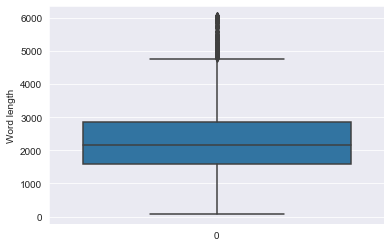

In [163]:
# box plot
sns.boxplot(data=len_full_text_train_list)
plt.ylabel("Word length");

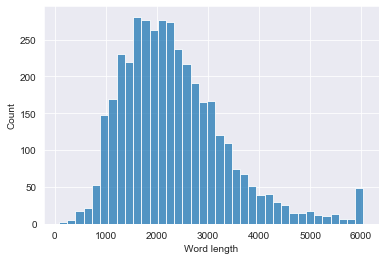

In [164]:
# hist plot
sns.histplot(data=len_full_text_train_list)
plt.xlabel("Word length");

### Statistics Feedback Criteria

In [165]:
# Overview stats
feedback_train_df = train_df.iloc[:, 2:]
feedback_train_df.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


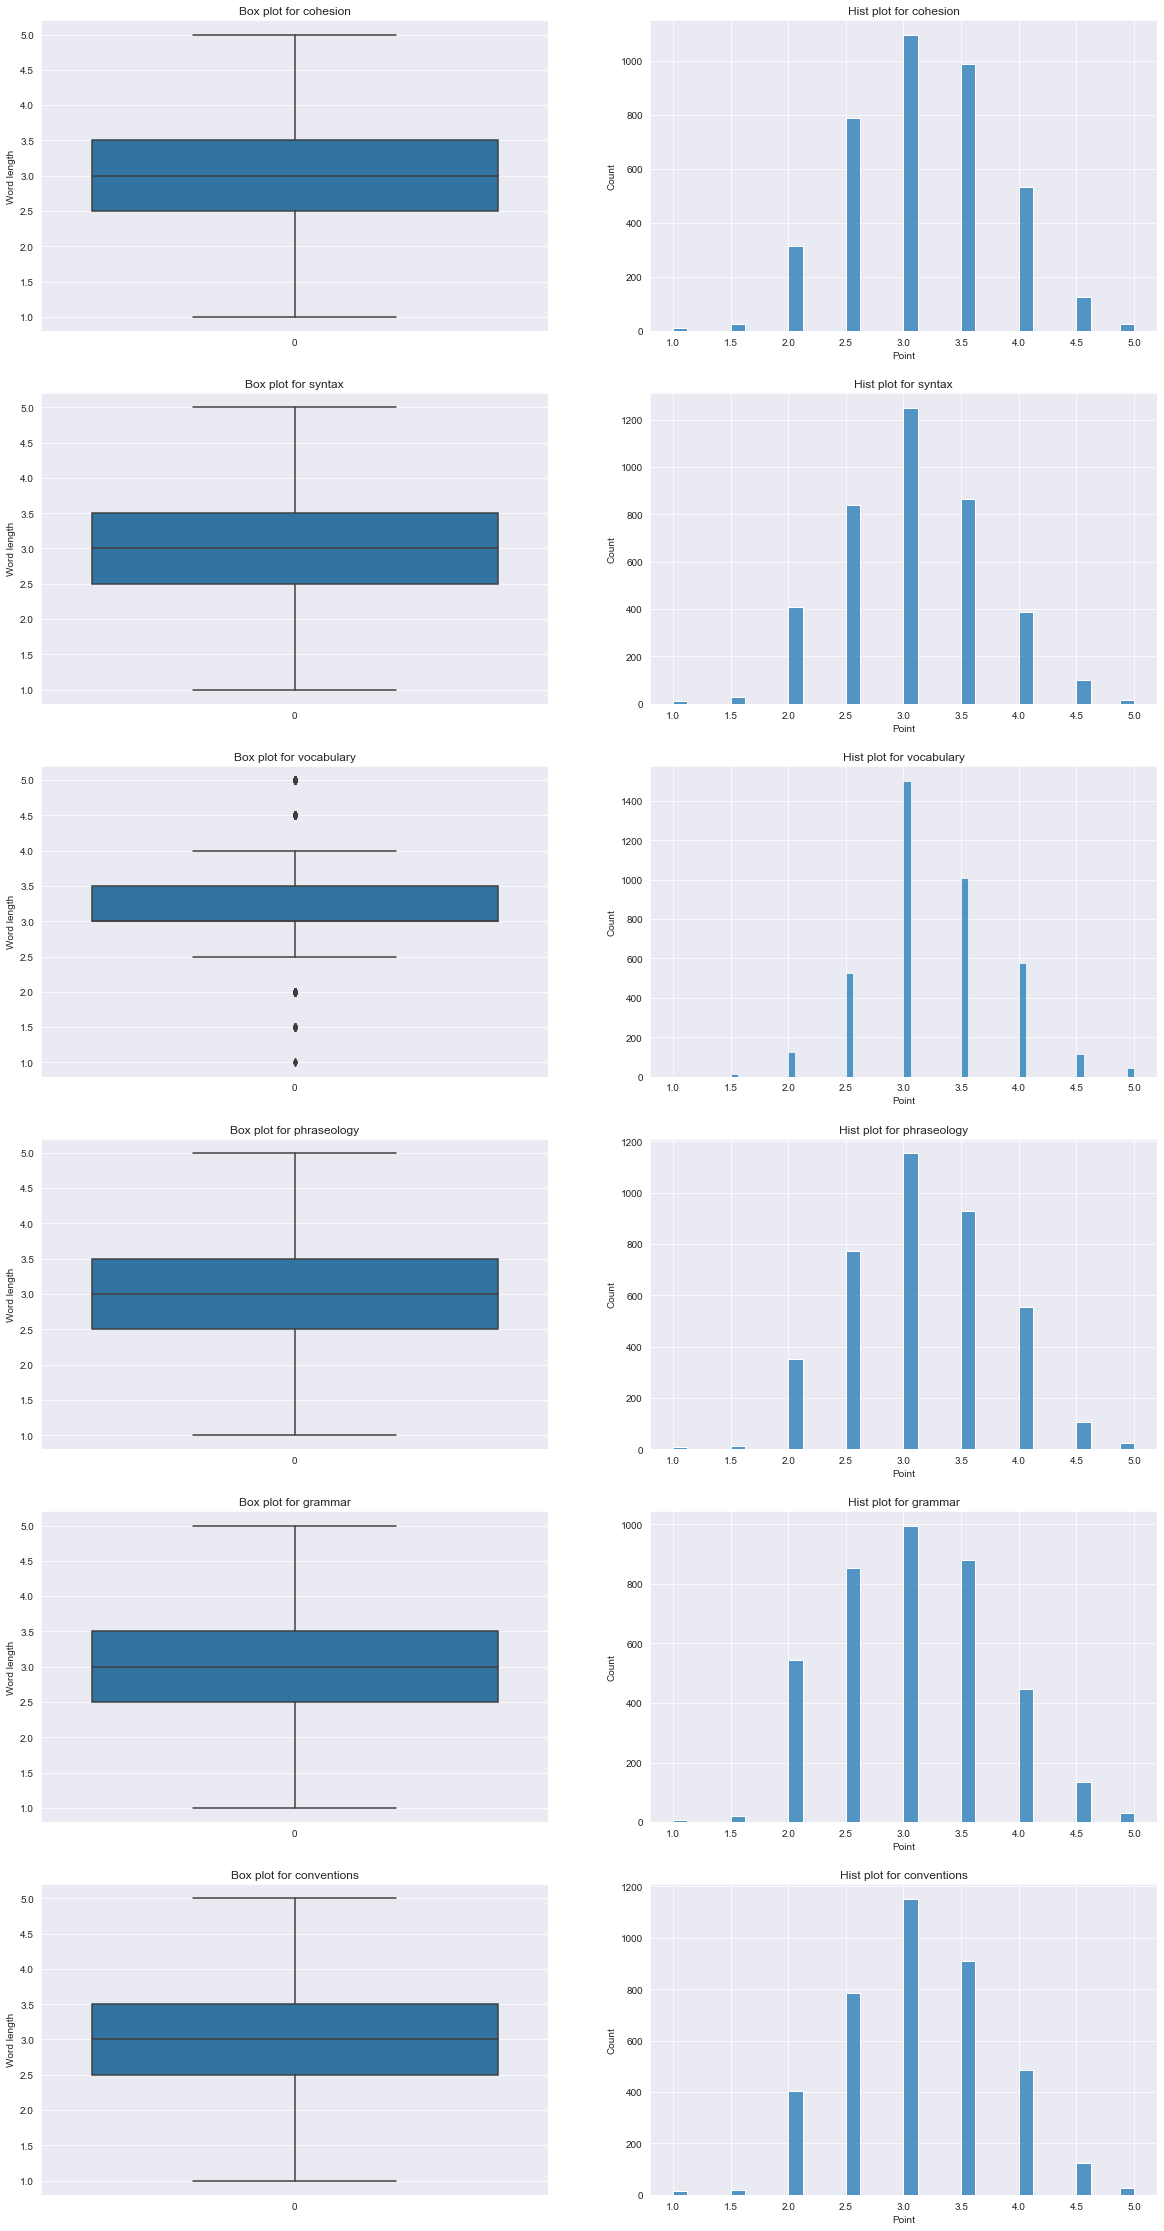

In [166]:
# Box plot and hist plot
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 40))
for idx, (col_name, col_data) in enumerate(feedback_train_df.iteritems()):
    sns.boxplot(data=col_data.values, ax=axes[idx][0])
    sns.histplot(data=col_data.values, ax=axes[idx][1])

    axes[idx][0].title.set_text(f"Box plot for {col_name}")
    axes[idx][0].set_ylabel("Word length")

    axes[idx][1].title.set_text(f"Hist plot for {col_name}")
    axes[idx][1].set_xlabel("Point")

**[Data insight]**
1. Distribution of data are similar
2. All of the feedback has the same range (1.0 - 5.0)

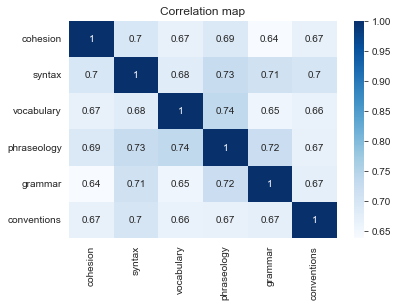

In [167]:
# Heat map
fig, ax = plt.subplots()
sns.heatmap(data=feedback_train_df.corr(),
            annot=True, cmap="Blues")
ax.title.set_text("Correlation map");

## Preprocessing

### Expand contractions

In [168]:
train_df['full_text'] = train_df['full_text'].apply(contractions.fix)
train_df['full_text'][0]

'I think that students would benefit from learning at home,because they will not have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they will be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit you go look in the mirror and you will either not like it or you look and see a stain. Then you will have to change. with the online classes you can wear anything and stay home and you will not need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time because they come late to school. when you have online classes you will not need to miss lessons because you can g

### Lowercase

In [169]:
train_df['full_text'] = train_df['full_text'].str.lower()
train_df['full_text'][0]

'i think that students would benefit from learning at home,because they will not have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they will be pay more attention. they will be comfortable at home.\n\nthe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit you go look in the mirror and you will either not like it or you look and see a stain. then you will have to change. with the online classes you can wear anything and stay home and you will not need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time because they come late to school. when you have online classes you will not need to miss lessons because you can g

### Remove punctuations

In [170]:
def remove_punctuations(text):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    return " ".join(tokenizer.tokenize(text))

train_df['full_text'] = train_df['full_text'].apply(remove_punctuations)
train_df['full_text'][0]


'i think that students would benefit from learning at home because they will not have to change and get up early in the morning to shower and do there hair taking only classes helps them because at there house they will be pay more attention they will be comfortable at home the hardest part of school is getting ready you wake up go brush your teeth and go to your closet and look at your cloths after you think you picked a outfit you go look in the mirror and you will either not like it or you look and see a stain then you will have to change with the online classes you can wear anything and stay home and you will not need to stress about what to wear most students usually take showers before school they either take it before they sleep or when they wake up some students do both to smell good that causes them do miss the bus and effects on there lesson time because they come late to school when you have online classes you will not need to miss lessons because you can get everything set 

### Remove words and digits containing digits

In [171]:
train_df['full_text'] = train_df['full_text'].apply(lambda x: re.sub('W*dw*','',x))
train_df['full_text'][0]

'i think that stuents woul benefit from learning at home because they will not have to change an get up early in the morning to shower an o there hair taking only classes helps them because at there house they will be pay more attention they will be comfortable at home the harest part of school is getting reay you wake up go brush your teeth an go to your closet an look at your cloths after you think you picke a outfit you go look in the mirror an you will either not like it or you look an see a stain then you will have to change with the online classes you can wear anything an stay home an you will not nee to stress about what to wear most stuents usually take showers before school they either take it before they sleep or when they wake up some stuents o both to smell goo that causes them o miss the bus an effects on there lesson time because they come late to school when you have online classes you will not nee to miss lessons because you can get everything set up an go take a shower

### Remove stopwords

In [172]:
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

train_df['full_text'] = train_df['full_text'].apply(remove_stopwords)
train_df['full_text'][0]

'think stuents woul benefit learning home change get early morning shower hair taking classes helps house pay attention comfortable home harest part school getting reay wake go brush teeth go closet look cloths think picke outfit go look mirror either like look see stain change online classes wear anything stay home nee stress wear stuents usually take showers school either take sleep wake stuents smell goo causes miss bus effects lesson time come late school online classes nee miss lessons get everything set go take shower get reay go home comfortable pay attention gives avantage smarter even pass classmates class work public schools ifficult even try teacher know teach way stuents unerstan causes stuents fail may repeat class'

### Stemming

In [173]:
lemmatizer = WordNetLemmatizer()

def stem_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

train_df['full_text'] = train_df['full_text'].apply(stem_words)
train_df['full_text'][0]

'think stuents woul benefit learning home change get early morning shower hair taking class help house pay attention comfortable home harest part school getting reay wake go brush teeth go closet look cloth think picke outfit go look mirror either like look see stain change online class wear anything stay home nee stress wear stuents usually take shower school either take sleep wake stuents smell goo cause miss bus effect lesson time come late school online class nee miss lesson get everything set go take shower get reay go home comfortable pay attention give avantage smarter even pas classmate class work public school ifficult even try teacher know teach way stuents unerstan cause stuents fail may repeat class'

### Remove extra spaces


In [174]:
train_df['full_text'] = train_df['full_text'].apply(lambda x: x.strip())
train_df['full_text'][0]

'think stuents woul benefit learning home change get early morning shower hair taking class help house pay attention comfortable home harest part school getting reay wake go brush teeth go closet look cloth think picke outfit go look mirror either like look see stain change online class wear anything stay home nee stress wear stuents usually take shower school either take sleep wake stuents smell goo cause miss bus effect lesson time come late school online class nee miss lesson get everything set go take shower get reay go home comfortable pay attention give avantage smarter even pas classmate class work public school ifficult even try teacher know teach way stuents unerstan cause stuents fail may repeat class'